# Characteristics of Time Series

In [1]:
# Load packages
using Distributions
using PyPlot
using RData

matplotlib.rcParams["text.usetex"] = true;

true

## Exercise 1.1

In [2]:
# Load data
EQ5 = load("../data/EQ5.rda")
EXP6 = load("../data/EXP6.rda");

Dict{String,Any} with 1 entry:
  "EXP6" => [-0.00183743, -0.000553787, -0.00228387, -0.000302613, -0.000721216…

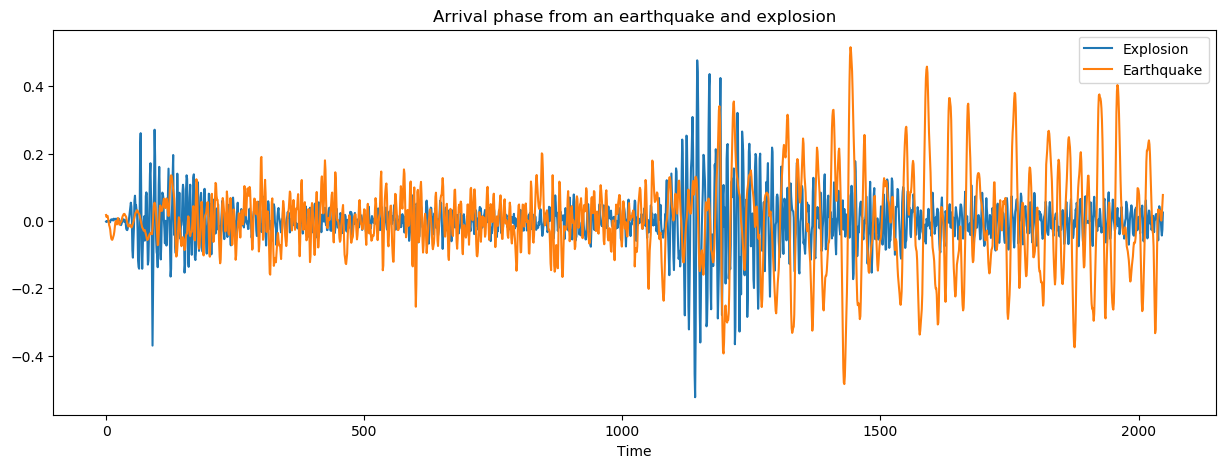

In [3]:
# Plot the data
figure(figsize=(15, 5))
plot(EXP6["EXP6"], label="Explosion")
plot(EQ5["EQ5"], label="Earthquake")
xlabel("Time")
legend()
title("Arrival phase from an earthquake and explosion")
show()

We observe that the earthquake follows the explosion. There should be a high correlation between the moment of the explosion and few moments later for the earthquake. Secondly, the intensity of the earthquake might depend on the intensity of the explosion.

## Exercise 1.2

Let's assume the following signal-plus-noise model:
$$x_t = s_t + w_t, \quad w_t \sim \mathcal{N}(0, 1)$$

* *Question (a)*

$x_t = s_t + w_t$, for $t = 1, \dots, 200$, where

$$s_t = \left\{
    \begin{array}{l l} 
        0, & t = 1, \dots, 100 \\ 
        10\exp\left(-\frac{(t - 100)}{20}\right)\cos(2\pi t / 4), & t = 101, \dots, 200
    \end{array}
  \right.$$

In [10]:
function signal_a(l)
    return [t < 101 ? 0 : 10 * exp(-(t - 100) / 20) * cos(2 * pi * t / 4) for t in l]
end

function signal_plus_noise_a(l)
    w = rand(Normal(), length(l))
    return signal_a(l) + w
end

signal_plus_noise_a (generic function with 1 method)

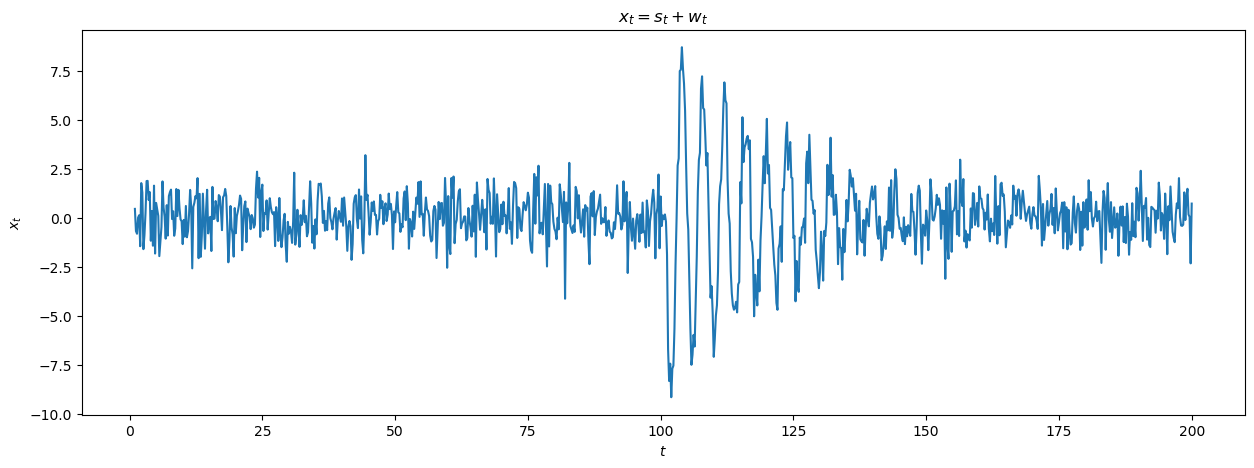

In [246]:
figure(figsize=(15, 5))
plot(1:0.2:200, signal_plus_noise_a(1:0.2:200))
xlabel(L"$t$")
ylabel(L"$x_t$")
title(L"x_t = s_t + w_t")
show()

* *Question (b)*

$x_t = s_t + w_t$, for $t = 1, \dots, 200$, where

$$s_t = \left\{
    \begin{array}{l l} 
        0, & t = 1, \dots, 100 \\ 
        10\exp\left(-\frac{(t - 100)}{200}\right)\cos(2\pi t / 4), & t = 101, \dots, 200
    \end{array}
  \right.$$

In [12]:
function signal_b(l)
    return [t < 101 ? 0 : 10 * exp(-(t - 100) / 200) * cos(2 * pi * t / 4) for t in l]
end

function signal_plus_noise_b(l)
    w = rand(Normal(), length(l))
    return signal_b(l) + w
end

signal_plus_noise_b (generic function with 1 method)

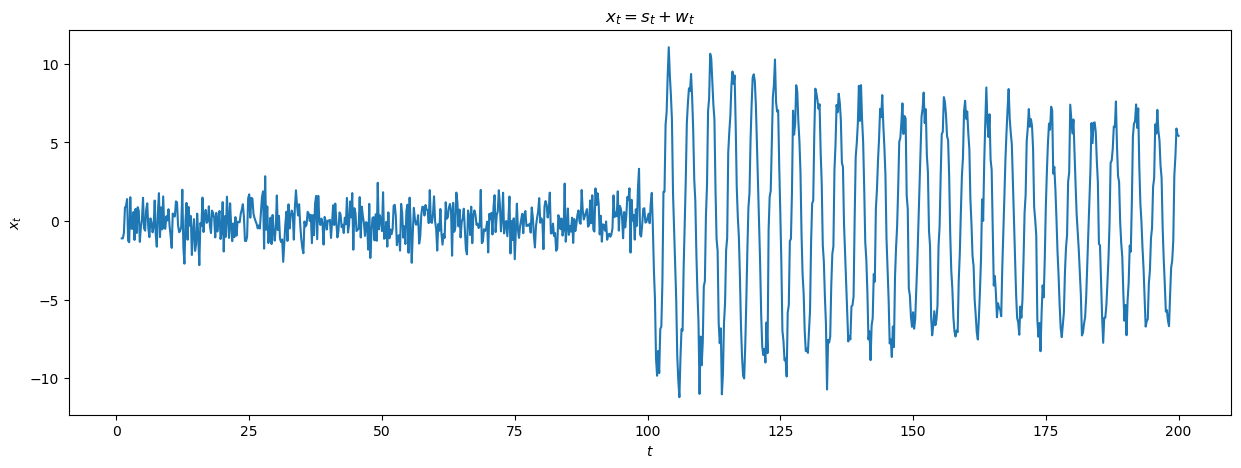

In [247]:
figure(figsize=(15, 5))
plot(1:0.2:200, signal_plus_noise_b(1:0.2:200))
xlabel(L"$t$")
ylabel(L"$x_t$")
title(L"x_t = s_t + w_t")
show()

* *Question (c)*

The serie (a) appears to be quite close to the explosion serie and the serie (b) appears to be quite close to the earthquake serie. Let's plot the signal modulators (a) $\exp(-t / 20)$ and (b) $\exp(-t / 200)$, for $t = 1, \dots, 100$.

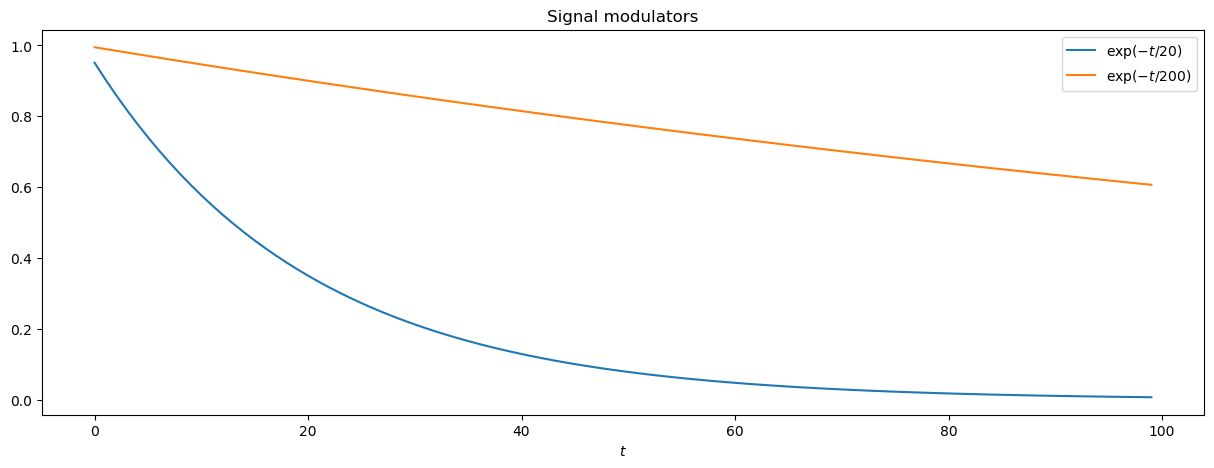

In [14]:
figure(figsize=(15, 5))
plot([exp(-t / 20) for t in 1:100], label=L"\exp(-t / 20)")
plot([exp(-t / 200) for t in 1:100], label=L"\exp(-t / 200)")
xlabel(L"$t$")
title("Signal modulators")
legend()
show()

The decreasing of the intensity of the first signal modulators is way larger than the second one.

## Exercise 1.3

* *Question (a)*

Consider the autoregression model:
$$x_t = -0.9x_{t-2} + w_t, \quad w_t \sim \mathcal{N}(0, 1).$$

First, we will define a recursive filter function and a convolution filter function (based on the [C function](https://github.com/SurajGupta/r-source/blob/master/src/library/stats/src/filter.c) of the **R** package stats).

In [219]:
function filter_recursive(x, filter)
    nx = length(x)
    nf = length(filter)
    
    out = vcat(x, Array{Float64}(undef, nf))
    for i in 1:nx
        Σ = x[i]
        for j in 1:nf
            tmp = out[i + nf - j]
            Σ += filter[j] * tmp
        end
        out[i + nf] = Σ
    end
    return out[(nf + 1):end]
end

function filter_convolution(x, filter, sides)
    nx = length(x)
    nf = length(filter)
    
    nshift = (sides == 1) ? 0 : (nf / 2)
    
    out = Array{Float64}(undef, nx)
    for i in 1:nx
        z = 0
        if (i + nshift - nf < 0) || (i + nshift > nx)
            out[i] = NaN
            continue
        end
        for j in (max(1, i + nshift - nx)):(min(nf, i + nshift - 1))
            tmp = x[i + nshift - j]
            z += filter[j] * tmp
        end
        out[i] = z
    end
    return out
end

filter_convolution (generic function with 1 method)

In [225]:
w = rand(Normal(), 500)
x = filter_recursive(w, [0, -0.9])
x_filter = filter_convolution(x, [0.25, 0.25, 0.25, 0.25], 1);

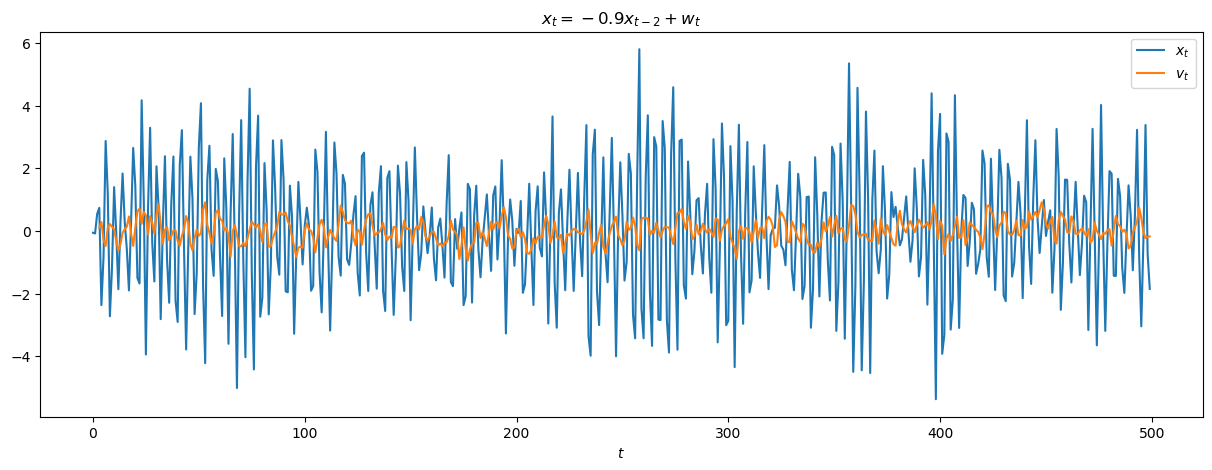

In [226]:
# Plot the time series
figure(figsize=(15, 5))
plot(x, label=L"x_t")
plot(x_filter, label=L"v_t")
xlabel(L"$t$")
title(L"x_t = -0.9x_{t-2} + w_t")
legend()
show()

The behavior of $x_t$ is very erratic, even if we might see some patterns within. The moving average filter completely change that behavior and smooth the serie such that no patterns are discernable.

* *Question (b)*

Consider the model:
$$x_t = \cos(2\pi t / 4).$$

In [248]:
x = [cos(2 * pi * t / 4) for t in 1:0.2:100]
x_filter = filter_convolution(x, [0.25, 0.25, 0.25, 0.25], 1);

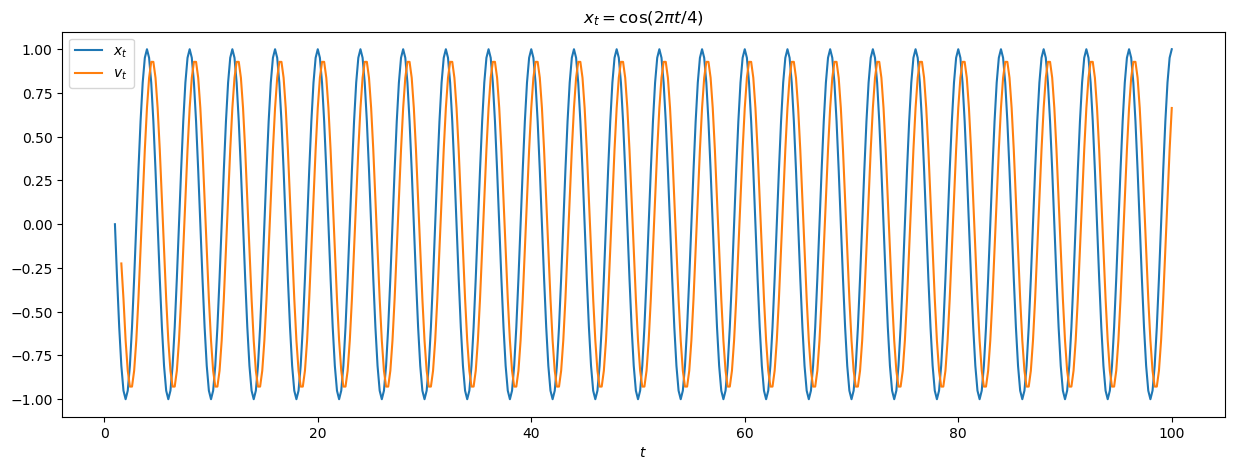

In [249]:
# Plot the time series
figure(figsize=(15, 5))
plot(1:0.2:100, x, label=L"x_t")
plot(1:0.2:100, x_filter, label=L"v_t")
xlabel(L"$t$")
title(L"x_t = \cos(2\pi t / 4)")
legend()
show()

The moving average filter has the effect of shifting the signal in this case.

* *Question (c)*

Consider the model:
$$x_t = \cos(2\pi t / 4) + w_t, \quad w_t \sim \mathcal{N}(0, 1).$$

In [250]:
w = rand(Normal(), 496)
x = [cos(2 * pi * t / 4) for t in 1:0.2:100] + w
x_filter = filter_convolution(x, [0.25, 0.25, 0.25, 0.25], 1);

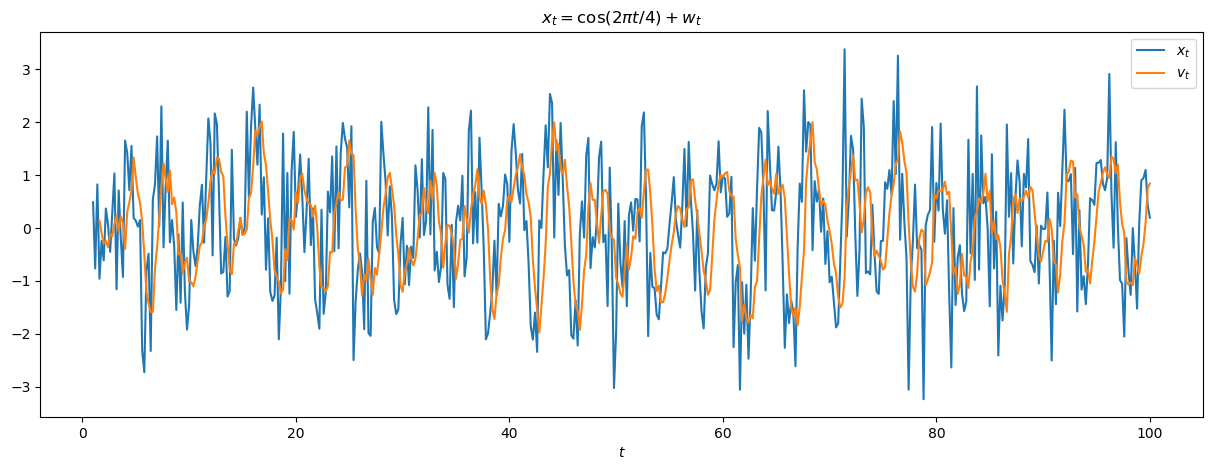

In [251]:
# Plot the time series
figure(figsize=(15, 5))
plot(1:0.2:100, x, label=L"x_t")
plot(1:0.2:100, x_filter, label=L"v_t")
xlabel(L"$t$")
title(L"x_t = \cos(2\pi t / 4) + w_t")
legend()
show()

Here, the moving average filter removes a bit the noise in the signal to recover the underlying "true" form of the signal.

* *Question (d)*

The filtering behaves differently for the different examples. For the first one, as the signal is basically just noise, the filtering will remove this component and so, return something close to 0. For the second one, there is no noise is the signal, the filtering insert a time lag in the signal. And for the last one, the filtering performs both the denoising and the shift of the signal. To obtain just a denoising, the filtering should be centered around the value. Something like,
$$v_t = (x_{t+2} + x_{t+1} + x_{t-1} + x_{t-2}) / 4.$$

## Exercise 1.4

Show that the autocovariance function can be written as
$$\gamma(s, t) = \mathbb{E}(x_sx_t) - \mu_s\mu_t, \quad\text{where}\quad \mathbb{E}(x_t) = \mu_t.$$

\begin{align}
\gamma(s, t) &= \mathbb{E}\left((x_s - \mu_s)(x_t - \mu_t\right) \\
             &= \mathbb{E}\left(x_sx_t - \mu_sx_t - x_s\mu_t + \mu_s\mu_t\right) \\
             &= \mathbb{E}(x_sx_t) - \mu_s\mathbb{E}(x_t) - \mu_t\mathbb{E}(x_s) + \mu_s\mu_t \\
             &= \mathbb{E}(x_sx_t) - \mu_s\mu_t
\end{align}

## Exercise 1.5

Recall the two series in the exercise 1.2:

* First serie:
$x_t = s_t + w_t$, for $t = 1, \dots, 200$, where

$$s_t = \left\{
    \begin{array}{l l} 
        0, & t = 1, \dots, 100 \\ 
        10\exp\left(-\frac{(t - 100)}{20}\right)\cos(2\pi t / 4), & t = 101, \dots, 200
    \end{array}
  \right.$$
  
* Second serie:
$x_t = s_t + w_t$, for $t = 1, \dots, 200$, where

$$s_t = \left\{
    \begin{array}{l l} 
        0, & t = 1, \dots, 100 \\ 
        10\exp\left(-\frac{(t - 100)}{200}\right)\cos(2\pi t / 4), & t = 101, \dots, 200
    \end{array}
  \right.$$
  
* *Question (a)*

We are in the case of *signal plus noise* model. So, in both serie, the mean functions will be $s(t)$.

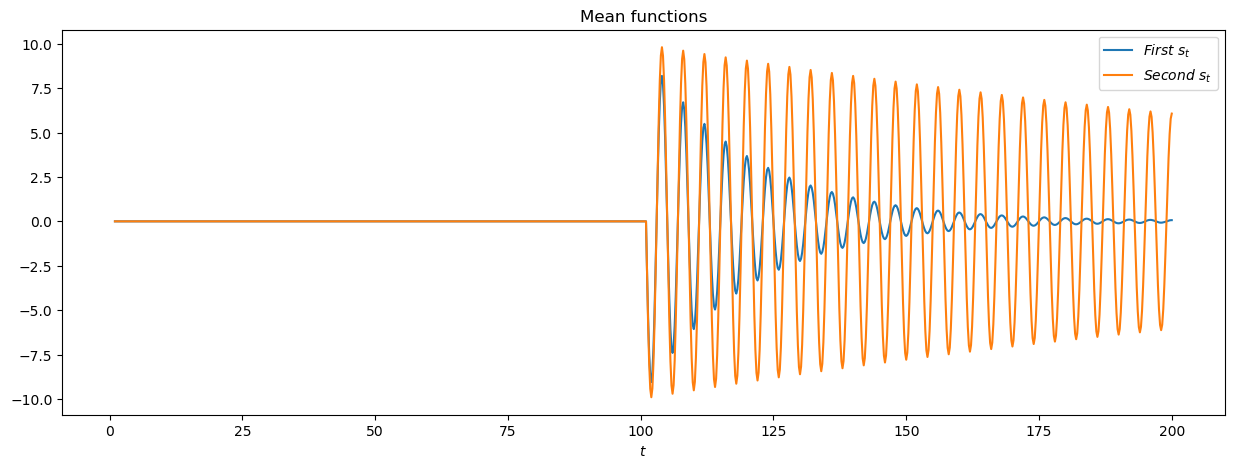

In [256]:
# Plot the mean functions
figure(figsize=(15, 5))
plot(1:0.2:200, signal_a(1:0.2:200), label=L"First~ s_t")
plot(1:0.2:200, signal_b(1:0.2:200), label=L"Second~ s_t")
xlabel(L"$t$")
title("Mean functions")
legend()
show()

* *Question (b)*

The autocovariance of the series will be the same, that is:
\begin{align}
\gamma(s,t) &= Cov(x_s, x_t) \\
            &= Cov(s_s + w_s, s_t + w_t) \\
            &= Cov(s_s, s_t) + Cov(s_s, w_t) + Cov(s_t, w_s) + Cov(w_s, w_t) \\
            &= Cov(w_s, w_t) \\
            &= \left\{
                    \begin{array}{r c l}
                        1 &if& s = t\\
                        0 &if& s \neq t \\
                    \end{array}
               \right.
\end{align}

## Exercise 1.6

Consider the time series
$$x_t = \beta_1 + \beta_2t + w_t,$$
where $\beta_1$ and $\beta_2$ are known constants and $w_t$ is a white noise process with variance $\sigma^2_w$.

* *Question (a)*

The serie $x_t$ is not (weakly) stationary because its mean function depends on time $t$:
$$\mu_x(t) = \beta_1 + \beta_2t.$$

* *Question (b)*

Define the process $y_t = x_t - x_{t - 1} = \beta_2 + w_t - w_{t - 1}$.

The mean function of the process $y_t$ is $\beta_2$ and, so, does not depend on time $t$.

The autocovariance is:
\begin{align}
\gamma(s, t) &= Cov(y_s, y_t) \\
             &= Cov(\beta_2 + w_s - w_{s-1}, \beta_2 + w_t - w_{t-1}) \\
             &= Cov(w_s, w_t) - Cov(w_s, w_{t-1}) - Cov(w_{s-1}, w_t) + Cov(w_{s-1}, w_{t-1}) \\
             &= \left\{
                    \begin{array}{r c l}
                        2\sigma_w^2 &if& s - t = 0\\
                        -\sigma_w^2 &if& \vert s - t \vert = 1\\
                    \end{array}
               \right.
\end{align}

So, the autocovariance only depends on the lag between $s$ and $t$ and not the absolute location of the points along the serie.

Finally, as the variance is finite, the serie is (weakly) stationary.

* *Question (c)*

The mean of the moving average is
\begin{align}
\mathbb{E}(v_t) &= \mathbb{E}\left(\frac{1}{2q + 1}\sum_{j=-q}^{q}x_{t-j}\right) \\
                &= \frac{1}{2q + 1}\sum_{j=-q}^{q}\mathbb{E}(x_{t-j}) \\
                &= \frac{1}{2q + 1}\sum_{j=-q}^{q}\mathbb{E}(\beta_1 + \beta_2(t-j) + w_{t-j}) \\
                &= \beta_1 + \beta_2t - \frac{\beta_2}{2q+1}\sum_{j=-q}^{q}j \\
                &= \beta_1 + \beta_2t
\end{align}